# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
baseUrl = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

weatherCheck = []

recordCounter = 1
setCounter = 1

print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
    query_url = f"{baseUrl}q={city}&appid={weather_api_key}&units={units}"
    weatherResponse = requests.get(query_url).json()
    try:
        cityName = weatherResponse["name"]
        lat = weatherResponse["coord"]["lat"]
        lng = weatherResponse["coord"]["lon"]
        maxTemp = weatherResponse["main"]["temp_max"]    
        humidity = weatherResponse["main"]["humidity"]     
        cloudiness = weatherResponse["clouds"]["all"] 
        windSpeed = weatherResponse["wind"]["speed"] 
        country = weatherResponse["sys"]["country"]     
        date = weatherResponse["dt"]        
        
        weatherCheck.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
        
        if recordCounter > 50:
            setCounter += 1
            recordCounter = 1
        print(f"Processing Record {recordCounter} of Set {setCounter} | {city}")
        recordCounter += 1
        
    except:
        print("City not found. Skipping...")
        
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | palembang
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | comodoro rivadavia
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | labrea
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | manggar
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | hasaki
Processing Record 23 of 

Processing Record 43 of Set 4 | awjilah
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | kungurtug
Processing Record 46 of Set 4 | danville
Processing Record 47 of Set 4 | anju
Processing Record 48 of Set 4 | provideniya
Processing Record 49 of Set 4 | banjar
Processing Record 50 of Set 4 | kapoeta
Processing Record 1 of Set 5 | yellowknife
Processing Record 2 of Set 5 | izyum
City not found. Skipping...
Processing Record 3 of Set 5 | kudat
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | igurubi
Processing Record 6 of Set 5 | mwadui
Processing Record 7 of Set 5 | blackwater
Processing Record 8 of Set 5 | severo-kurilsk
Processing Record 9 of Set 5 | lindsay
Processing Record 10 of Set 5 | solnechnyy
Processing Record 11 of Set 5 | krasnoselkup
Processing Record 12 of Set 5 | san cristobal
Processing Record 13 of Set 5 | sao mateus
Processing Record 14 of Set 5 | mar del plata
Processing Rec

Processing Record 29 of Set 8 | kasempa
Processing Record 30 of Set 8 | talnakh
Processing Record 31 of Set 8 | ardakan
Processing Record 32 of Set 8 | chapais
Processing Record 33 of Set 8 | khandyga
Processing Record 34 of Set 8 | shingu
Processing Record 35 of Set 8 | cabo rojo
Processing Record 36 of Set 8 | cayenne
Processing Record 37 of Set 8 | pisco
Processing Record 38 of Set 8 | lindi
Processing Record 39 of Set 8 | vestmannaeyjar
City not found. Skipping...
Processing Record 40 of Set 8 | nara
Processing Record 41 of Set 8 | copiapo
Processing Record 42 of Set 8 | hibbing
Processing Record 43 of Set 8 | vanavara
Processing Record 44 of Set 8 | scarborough
Processing Record 45 of Set 8 | tigzirt
Processing Record 46 of Set 8 | karacakoy
Processing Record 47 of Set 8 | atagay
Processing Record 48 of Set 8 | harper
Processing Record 49 of Set 8 | kahului
Processing Record 50 of Set 8 | kodinsk
Processing Record 1 of Set 9 | tautira
Processing Record 2 of Set 9 | key biscayne
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# #######

In [5]:
cityData_df = pd.DataFrame(weatherCheck)
cityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,35.60,90,40,21.92,AR,1594576786
1,Palembang,-2.92,104.75,74.37,94,73,3.47,ID,1594577236
2,Hermanus,-34.42,19.23,56.44,59,0,11.05,ZA,1594576662
3,Comodoro Rivadavia,-45.87,-67.50,46.40,36,20,16.11,AR,1594576692
4,Cherskiy,68.75,161.30,49.26,94,100,3.04,RU,1594576728
...,...,...,...,...,...,...,...,...,...
544,Rantepao,-2.97,119.90,68.22,91,100,0.20,ID,1594577268
545,Honiara,-9.43,159.95,75.20,100,75,2.24,SB,1594577268
546,Wamba,8.93,8.60,77.04,80,100,3.29,NG,1594577268
547,Uddevalla,58.35,11.94,64.00,80,22,8.01,SE,1594577268


In [6]:

#######

cityData_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cityData_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,20.757304,20.239490,70.544736,68.198543,49.229508,7.993315,1.594577e+09
std,32.590498,91.182516,14.806517,20.993802,36.949094,5.319855,2.189956e+02
min,-54.800000,-179.170000,32.000000,3.000000,0.000000,0.180000,1.594576e+09
25%,-5.200000,-63.000000,58.840000,55.000000,13.000000,3.830000,1.594577e+09
50%,25.020000,26.890000,72.000000,73.000000,46.000000,6.930000,1.594577e+09
75%,48.800000,103.210000,81.000000,84.000000,87.000000,11.120000,1.594577e+09
max,78.220000,179.320000,104.500000,100.000000,100.000000,33.290000,1.594577e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
over100Humidity = cityData_df.loc[cityData_df["Humidity"] > 100]
over100Humidity_index = over100Humidity.index
over100Humidity_index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleanCityData_df = cityData_df.drop(labels = over100Humidity_index, inplace = False)


cleanCityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,35.60,90,40,21.92,AR,1594576786
1,Palembang,-2.92,104.75,74.37,94,73,3.47,ID,1594577236
2,Hermanus,-34.42,19.23,56.44,59,0,11.05,ZA,1594576662
3,Comodoro Rivadavia,-45.87,-67.50,46.40,36,20,16.11,AR,1594576692
4,Cherskiy,68.75,161.30,49.26,94,100,3.04,RU,1594576728
...,...,...,...,...,...,...,...,...,...
544,Rantepao,-2.97,119.90,68.22,91,100,0.20,ID,1594577268
545,Honiara,-9.43,159.95,75.20,100,75,2.24,SB,1594577268
546,Wamba,8.93,8.60,77.04,80,100,3.29,NG,1594577268
547,Uddevalla,58.35,11.94,64.00,80,22,8.01,SE,1594577268


In [10]:
# # Extract relevant fields from the data frame
latitude = cleanCityData_df["Lat"]
longitude = cleanCityData_df["Lng"]
temperature = cleanCityData_df["Max Temp"]
humidity = cleanCityData_df["Humidity"]
cloudiness = cleanCityData_df["Cloudiness"]
wind_speed = cleanCityData_df["Wind Speed"]

cleanCityData_df.reset_index()
cleanCityData_df.index.name = "City_ID"

# Export the City_Data into a csv

outputData = cleanCityData_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

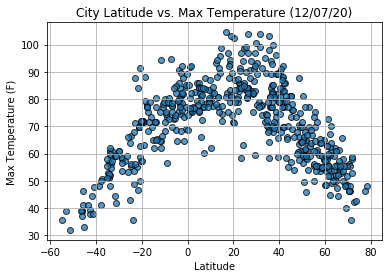

In [11]:
# plt.hlines(temperature, xmin = min(latitude), xmax = max(latitude))

currentDate = pd.to_datetime("today")
currentDate = currentDate.strftime("%d/%m/%y")

plt.scatter(latitude, temperature, marker = "o", alpha = 0.75, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({currentDate})")
##### plt.ylim(0, max(temperature))
plt.grid(True)
plt.savefig("../Output/lat_temp.png")

# Observable Trends:

* As we approach the equator, the weather gets hotter.
* As we move away from the equator i.e. towards northern hemisphere or southern hemisphere, the temperature decreases.
* At the latitude between 20 to 40 degrees, we observe maximum temperature.


## Latitude vs. Humidity Plot

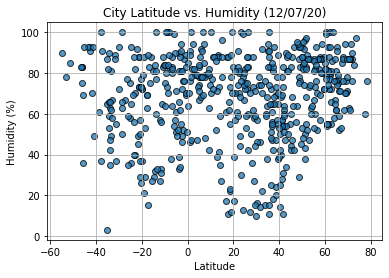

In [12]:
# plt.figure(figsize = (8,8))
plt.scatter(latitude, humidity, marker = "o", alpha = 0.75, edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({currentDate})")
# ##### plt.ylim(0, max(temperature))
plt.grid(True)
plt.savefig("../Output/lat_humidity.png")

# Observable Trend:

* The Northern hemisphere has more humid weather than Southern hemisphere. 
* Most city has higher humidity percentage i.e. greater than 60%.

## Latitude vs. Cloudiness Plot

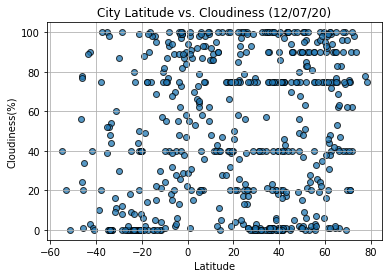

In [13]:
plt.scatter(latitude, cloudiness, marker = "o", alpha = 0.75, edgecolors = "black" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({currentDate})")
# ##### plt.ylim(0, max(temperature))
plt.grid(True)
plt.savefig("../Output/lat_cloudiness.png")


# Observable Trend:

There is no observable trend between latitude and cloudiness. In other words, we can say that cloudiness does not depend on latitude.

## Latitude vs. Wind Speed Plot

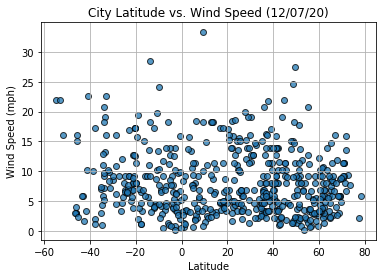

In [14]:
plt.scatter(latitude, wind_speed, marker = "o", alpha = 0.75, edgecolors = "black" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({currentDate})")
# ##### plt.ylim(0, max(temperature))
plt.grid(True)
plt.savefig("../Output/lat_windSpeed.png")


# Observable Trend:

* The range of wind speed lies between 0 mph to 10 mph. 
* Cities near the extreme southern or northern hemisphere observe increase in wind speed.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

def linearRegression(x_value, y_value, x_annotation, y_annotation):
 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    print(f"The r-squared is: {rvalue** 2}")
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_value,y_value, marker="o", edgecolors = "black", alpha = 0.75)
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(x_annotation, y_annotation),fontsize = 20, color="red")


In [16]:
# Create Northern and Southern Hemisphere DataFrames
northernHemisphere = []
southernHemisphere = []

for city in cities:
    query_url = f"{baseUrl}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    print
    try:

        if response["coord"]["lat"] >= 0:

            cityName = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            maxTemp = response["main"]["temp_max"]    
            humidity = response["main"]["humidity"]     
            cloudiness = response["clouds"]["all"] 
            windSpeed = response["wind"]["speed"] 
            country = response["sys"]["country"]     
            date = response["dt"]        
        
            northernHemisphere.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
        else:
            
            cityName = response["name"]
            lat = response["coord"]["lat"]
            lng = response["coord"]["lon"]
            maxTemp = response["main"]["temp_max"]    
            humidity = response["main"]["humidity"]     
            cloudiness = response["clouds"]["all"] 
            windSpeed = response["wind"]["speed"] 
            country = response["sys"]["country"]     
            date = response["dt"]        
        
            southernHemisphere.append({"City" : cityName,
                            "Lat": lat,
                            "Lng" : lng,
                            "Max Temp" : maxTemp,
                            "Humidity" : humidity,
                            "Cloudiness" : cloudiness,
                            "Wind Speed" : windSpeed,
                            "Country" : country,
                             "Date" : date
                            })
           
    except:
        
        print("City not found. Skipping...")
        


City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [17]:
northernHemisphere_df = pd.DataFrame(northernHemisphere)
southernHemisphere_df = pd.DataFrame(southernHemisphere)

northernHemisphere_data = northernHemisphere_df.to_csv("../Output/northern_hemisphere_data.csv")

northernHemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.75,161.30,49.26,94,100,3.04,RU,1594576728
1,Lagoa,39.05,-27.98,68.85,78,0,17.05,PT,1594576847
2,Upernavik,72.79,-56.15,42.30,84,98,9.40,GL,1594576837
3,Bethel,41.37,-73.41,84.00,57,75,9.17,US,1594576835
4,Albany,42.60,-73.97,86.00,47,43,1.01,US,1594576665


In [18]:
southernHemisphere_data = southernHemisphere_df.to_csv("../Output/southern_hemisphere_data.csv")

southernHemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,35.60,90,40,21.92,AR,1594576786
1,Palembang,-2.92,104.75,74.37,94,73,3.47,ID,1594577236
2,Hermanus,-34.42,19.23,56.44,59,0,11.05,ZA,1594576662
3,Comodoro Rivadavia,-45.87,-67.50,46.40,36,20,16.11,AR,1594576692
4,Port Elizabeth,-33.92,25.57,60.80,63,0,9.17,ZA,1594576787


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5181035399255852


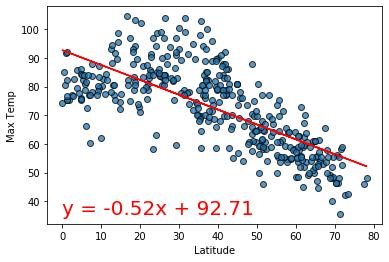

In [19]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Max Temp"], northernHemisphere_df["Lat"].min(), northernHemisphere_df["Max Temp"].min())  
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../Output/linreg_north_lat_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6952378489129687


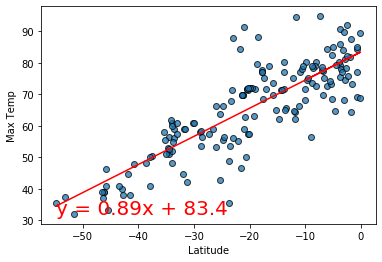

In [20]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Max Temp"], southernHemisphere_df["Lat"].min(), southernHemisphere_df["Max Temp"].min())
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../Output/linreg_south_lat_temp.png")
plt.show()

# Observable Trends - Northern and Southern hemisphere Latitude vs Max Temp

* As we move away from the equator, we observe a decrease in temperature.
* The r-squared value of northern hemisphere is 0.44 which means  that the model explains almost all the variability of the data around its mean.
* As per the Southern hemisphere plot, we observe that as we approach towards the equator, the temperature increases. 
*  The r-squared value of southern hemisphere is 0.54 which means  that the model explains almost all the variability of the data around its mean.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012628987116408348


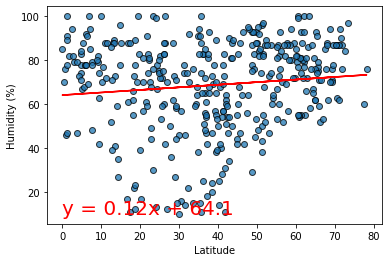

In [21]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Humidity"], northernHemisphere_df["Lat"].min() , northernHemisphere_df["Humidity"].min())
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Output/linreg_north_lat_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001057306311054891


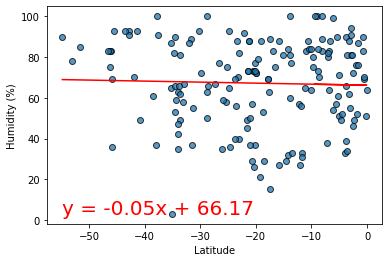

In [22]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Humidity"], southernHemisphere_df["Lat"].min() , southernHemisphere_df["Humidity"].min() )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Output/linreg_south_lat_humidity.png")
plt.show()

# Observable Trends - Northern and Southern hemisphere Latitude vs Max Temp

* Northern hemisphere is more humid than southern hemisphere.
* The r-squared value of northern hemisphere is 0.0126 and that of southern hemisphere is 0.00105 which means  that the model failed to explain the variablity of humidity.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007403414638545304


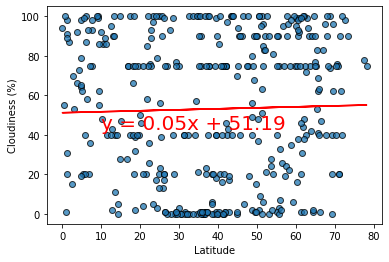

In [23]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Cloudiness"], 10, 43)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Output/linreg_north_lat_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0805298107078477


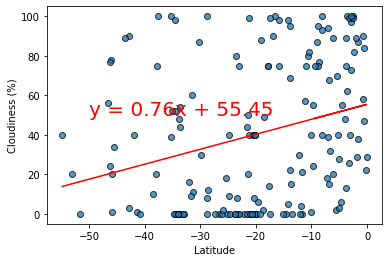

In [24]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Cloudiness"], -50, 50)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Output/linreg_south_lat_cloudiness.png")
plt.show()

# Observable Trends - Northern and Southern hemisphere Latitude vs Max Temp

* Nothern hemisphere is more cloudy than southern hemisphere.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0034537138104401457


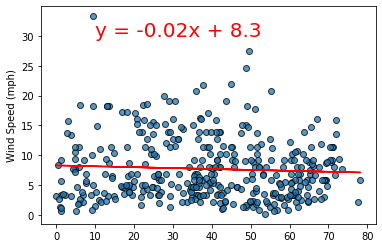

In [25]:
linearRegression(northernHemisphere_df["Lat"], northernHemisphere_df["Wind Speed"], 10, 30)
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Output/linreg_north_lat_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03409177654828255


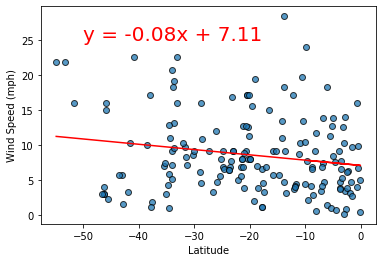

In [26]:
linearRegression(southernHemisphere_df["Lat"], southernHemisphere_df["Wind Speed"], -50, 25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Output/linreg_south_lat_wind.png")
plt.show()

# Observable Trends - Northern and Southern hemisphere Latitude vs Max Temp

* In northern hemisphere, most cities are having wind speed in the range between 0 mph to 15 mph.
* In southern hemkisphere, h
* The r-squared value of northern hemisphere is 0.44 which means  that the model explains almost all the variability of the data around its mean.
* As per the Southern hemisphere plot, we observe that as we approach towards the equator, the temperature increases. 
*  The r-squared value of southern hemisphere is 0.54 which means  that the model explains almost all the variability of the data around its mean.